<a href="https://colab.research.google.com/github/Bommisrilekkhaa/ML/blob/main/polynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
x = data.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y = data.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
#linear reg
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [ ]:
#polynomial reg deg-2
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

In [ ]:
#polynomial reg deg-3
poly_reg2 = PolynomialFeatures(degree=3)
X_poly1 = poly_reg2.fit_transform(x)
lin_reg3 = LinearRegression()
lin_reg3.fit(X_poly1,y)

LinearRegression()

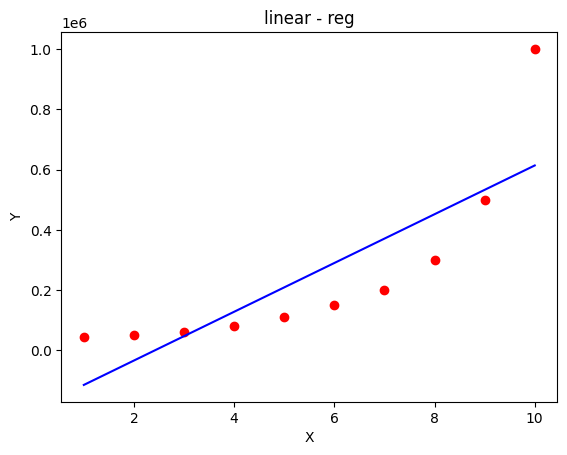

In [ ]:
#plot for linear -reg
plt.scatter(x,y,color='r')
plt.plot(x,lin_reg.predict(x),color='b')
plt.title("linear - reg")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


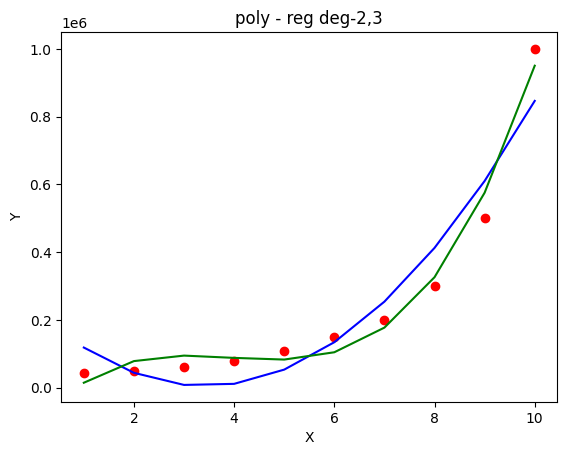

In [ ]:
#plot for poly - reg deg-2
plt.scatter(x,y,color='r')
plt.plot(x,lin_reg2.predict(X_poly),color='b')
plt.plot(x,lin_reg3.predict(X_poly1),color='g')
plt.title("poly - reg deg-2,3")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data1 = pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Real%20estate.csv")
data1

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
data1.shape

(414, 8)

In [ ]:
data1.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
data1.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

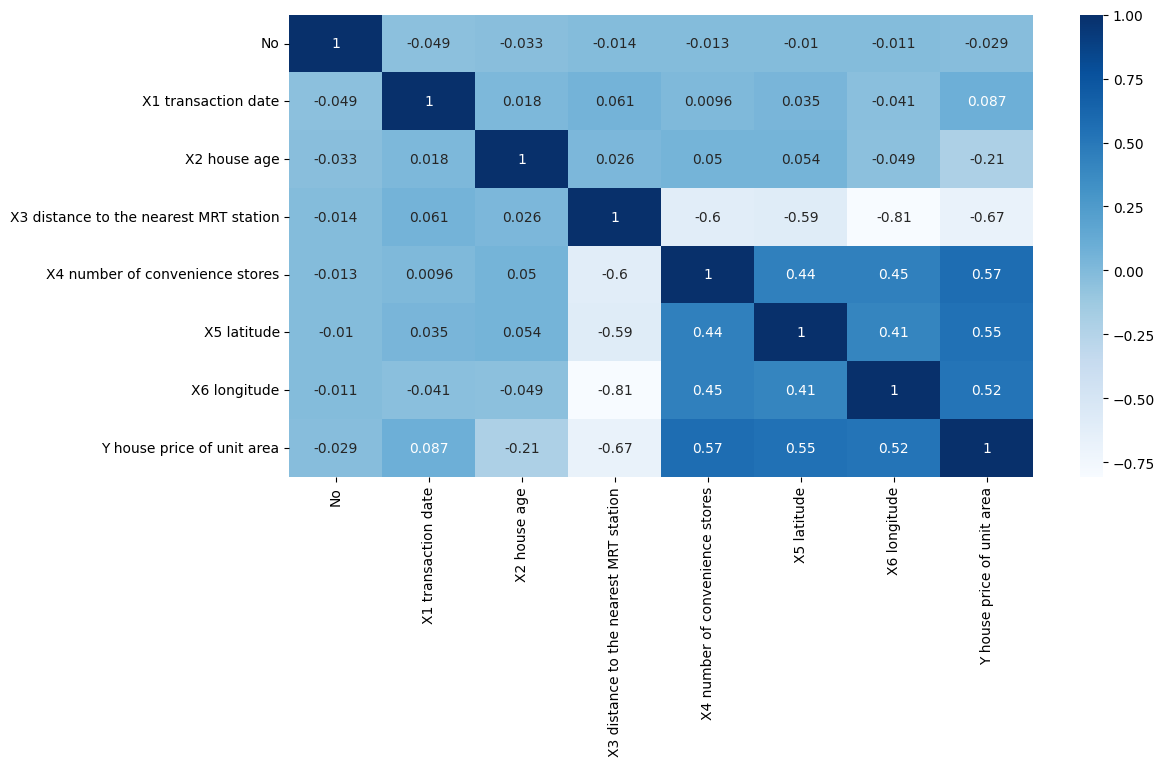

In [ ]:
import seaborn as sns
plt.subplots(figsize=(12,6))
sns.heatmap(data1.corr(),annot=True,cmap="Blues")

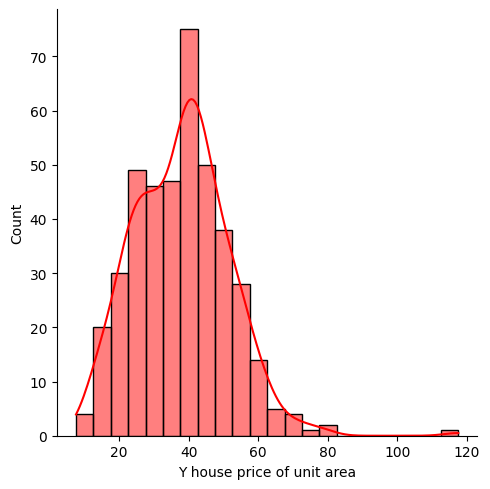

In [ ]:
sns.displot(data=data1, x='Y house price of unit area',kde=True,color='r')

In [ ]:
x = data1.drop("Y house price of unit area",axis=1)
x

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


In [ ]:
y=data1['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [ ]:
polynomial_reg=PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
poly_feat=polynomial_reg.fit_transform(x)
poly_feat.shape

(414, 35)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(poly_feat, y, test_size=0.3,random_state=101)

In [ ]:
poly_model = LinearRegression()
poly_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = poly_model.predict(x_test)

In [ ]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred,'residuals':(y_test-y_pred)})

,y_test,y_pred,residuals
176,19.2,16.382290,2.817710
347,11.2,3.929467,7.270533
307,24.7,17.438173,7.261827
299,46.1,47.146074,-1.046074
391,31.3,27.340929,3.959071
...,...,...,...
16,70.1,62.313409,7.786591
31,25.0,37.389346,-12.389346
36,22.9,22.208545,0.691455
41,18.2,20.202241,-2.002241


In [ ]:
poly_MAE = metrics.mean_absolute_error(y_test,y_pred)
poly_MSE = metrics.mean_squared_error(y_test,y_pred)
poly_RMSE = np.sqrt(poly_MSE)

print(poly_MAE)
print(poly_MSE)
print(poly_RMSE)

4.490907510614394
32.40292546700271
5.6923567585845065
